# HW1 - Classification models in sklearn

Using sklearn classification models and pipelines to predict home sale prices in Seattle and King County, WA (May 2014 - 2015).

By: Haley McDowell

## Preliminaries

In [442]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [444]:
%matplotlib inline

## Load data from csv

In [445]:
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')

First, we can view the structure of the dataframe.

In [446]:
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [447]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

## EDA

The following code was run in Jupyter Notebook to obtain the SweetViz html found here: ./output/sweetviz_report.html.

In [448]:
# import sweetviz as sv

In [449]:
# report = sv.analyze(housing_df)

In [450]:
# report.show_html("output/sweetviz_report.html")

## Categorize Feature Types

In [452]:
# Create list specifying which of the columns are categorical (excluding target variable).

categorical_columns = ['waterfront', 'yr_built', 'yr_renovated', 'zipcode']

In [453]:
# Create column for target variable.

target_column = ['price_gt_1M']

In [454]:
# Create empty list for the numeric columns.
numeric_columns = []

In [455]:
# Use an if statement to determine which of the columns are numeric.

for col in housing_df:
    if col not in categorical_columns:
        if col not in target_column:
            numeric_columns.append(col)

In [456]:
numeric_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [457]:
categorical_columns

['waterfront', 'yr_built', 'yr_renovated', 'zipcode']

In [458]:
target_column

['price_gt_1M']

## Preprocessing Stage

In [459]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [460]:
# Create StandardScaler object to use on numeric variables.

numeric_transformer = StandardScaler()

In [461]:
# Create transformer object to use on categorical variables.

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [462]:
# Preprocessing step.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)])

In [463]:
# Break housing_df into two dataframes.

X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [464]:
# Split the data into test and train datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

## Building the Models

### Model 0: the null model

In [465]:
from sklearn.dummy import DummyClassifier

# Use the DummyClassifier most_frequent strategy to create the null model.
model0 = DummyClassifier(strategy = 'most_frequent')

# Fit the model.
model0.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [466]:
print(f"Training score: {model0.score(X_train, y_train):.3f}")
print(f"Test score: {model0.score(X_test, y_test):.3f}")

Training score: 0.933
Test score: 0.924


### Model 1: Ridge Regression with C = 1.0

In [467]:
# Classifier model.
model1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

In [468]:
# Build the full prediction pipeline.
model1_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model1)])

In [469]:
# Fit the model.
model1_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, solver='saga'))])

In [470]:
print(f"Training score: {model1_pipeline.score(X_train, y_train):.3f}")
print(f"Test score: {model1_pipeline.score(X_test, y_test):.3f}")

Training score: 0.977
Test score: 0.970


Model 1 scored better than the null model for both the training and test datasets. The training and test scores for Model 1 are similar, indicating overfitting/underfitting is not an issue here.

#### Confusion Matrices

In [471]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion matrix for train, without normalization
[[16015   112]
 [  291   872]]
Normalized confusion matrix for train
[[0.99305512 0.00694488]
 [0.25021496 0.74978504]]


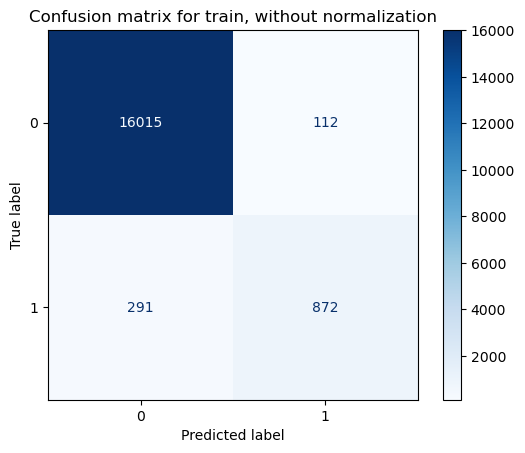

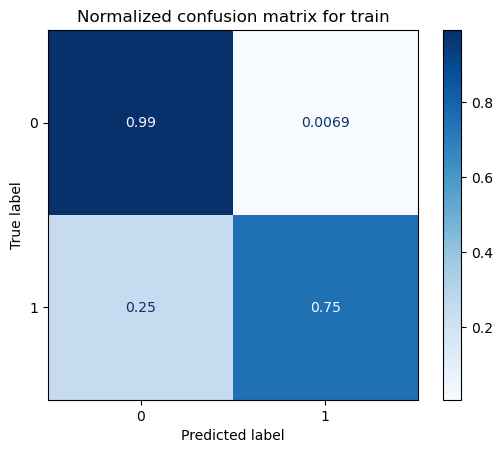

In [472]:
# Training confusion matrix

titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = model1_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model1_pipeline, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3958   36]
 [  92  237]]
Normalized confusion matrix for test
[[0.99098648 0.00901352]
 [0.27963526 0.72036474]]


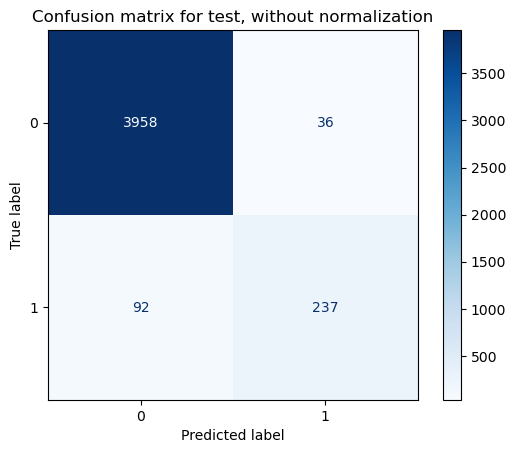

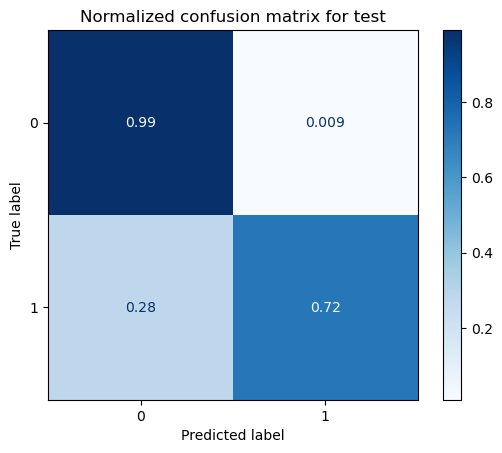

In [473]:
# Test confusion matrix

titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = model1_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model1_pipeline, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Plot of Coefficients

In [474]:
model1_pipeline.steps[1]

('classifier', LogisticRegression(max_iter=2000, solver='saga'))

In [475]:
# Define coef_plot to use for creating the plot of coefficients for each model.

def coef_plot(model, title=None):
    fig, ax = plt.subplots()
       
    if title:
        ax.set_title(title)

    ax.plot(model.steps[1][1].coef_[0])

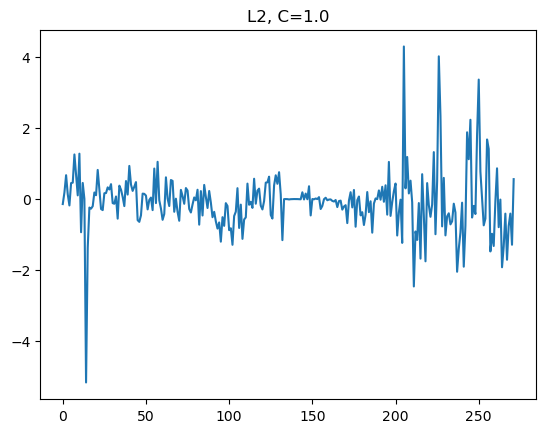

In [476]:
# Model 1 Plot of Coefficients

coef_plot(model1_pipeline, 'L2, C=1.0')
plt.show()

### Model 2: Lasso Regression with C = 1.0

In [477]:
# Classifier model.
model2 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

In [478]:
# Build the full prediction pipeline.
model2_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model2)])

In [479]:
# Fit the model.
model2_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [480]:
print(f"Training score: {model2_pipeline.score(X_train, y_train):.3f}")
print(f"Test score: {model2_pipeline.score(X_test, y_test):.3f}")

Training score: 0.976
Test score: 0.970


Model 2 performed better than the null model for both the training and test data. It performed quite similar as Model 1 which used Ridge Regression. The training score only differed by .001 and the test score was the same. By looking at the training confusion matrix below, it seems Model 1 scored just 4 more homes correctly than Model 2 on the training data.

Like Model 1, Model 2 has a training and test score very close to one another so there is no evidence of overfitting/underfitting.

#### Confusion Matrices

Confusion matrix for train, without normalization
[[16007   120]
 [  287   876]]
Normalized confusion matrix for train
[[0.99255906 0.00744094]
 [0.24677558 0.75322442]]


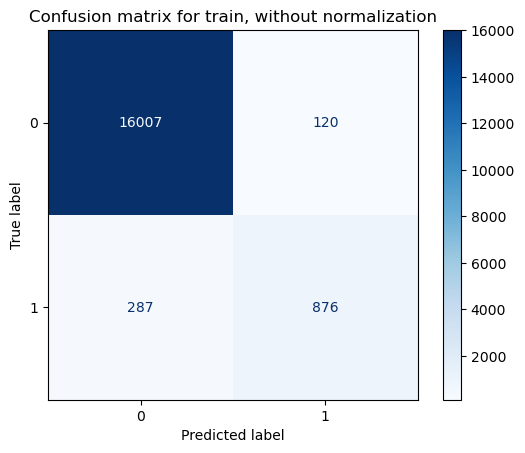

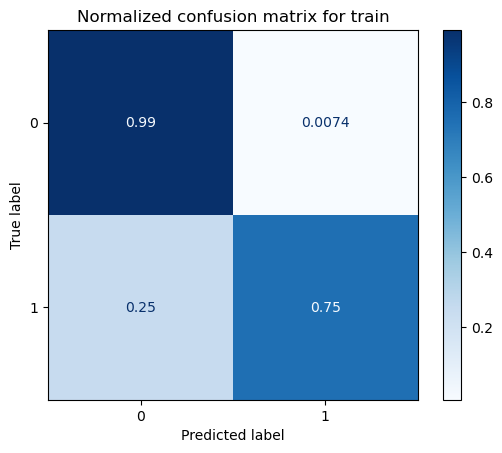

In [482]:
# Training confusion matrix

titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = model2_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model2_pipeline, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3961   33]
 [  95  234]]
Normalized confusion matrix for test
[[0.99173761 0.00826239]
 [0.2887538  0.7112462 ]]


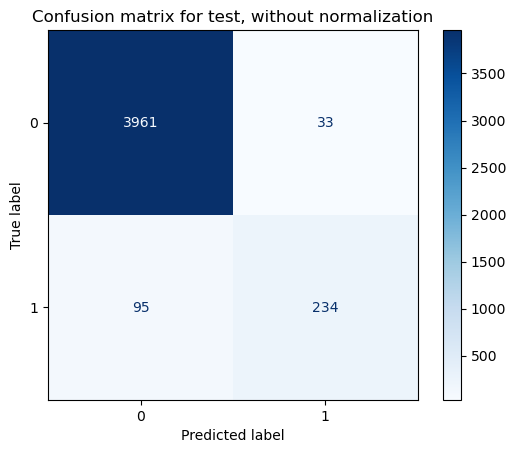

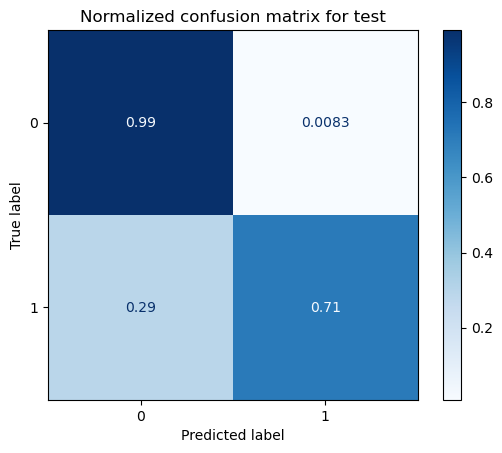

In [483]:
# Test confusion matrix

titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = model2_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model2_pipeline, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Plot of Coefficients

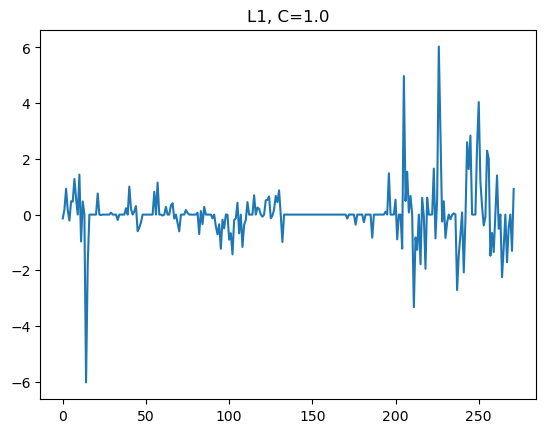

In [484]:
# Model 2 Plot of Coefficients

coef_plot(model2_pipeline, 'L1, C=1.0')
plt.show()

### Model 3: Lasso Regression with C = .01

In [485]:
# Classifier model.
model3 = LogisticRegression(penalty='l1', C=.01, solver='saga', max_iter=2000)

In [486]:
# Build the full prediction pipeline.
model3_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model3)])

In [487]:
# Fit the model.
model3_pipeline.fit(X_train, y_train)

/Applications/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [488]:
print(f"Training score: {model3_pipeline.score(X_train, y_train):.3f}")
print(f"Test score: {model3_pipeline.score(X_test, y_test):.3f}")

Training score: 0.959
Test score: 0.959


The lower C value in Model 3 indicates more enforcement of regularization compared to Model 2.

Model 3 score better than the null model, but worse than Model 2 or 3 for both the training and test data. By looking at the test data confusion matrix below, the model does a good job at predicting a 0 when the house is under 1 million but struggles quite a bit with predicting a 1 when the house is over 1 million.

The training score matches the test score exactly in Model 3, so there is no evidence of overfitting/underfitting.

#### Confusion Matrices

Confusion matrix for train, without normalization
[[16018   109]
 [  592   571]]
Normalized confusion matrix for train
[[0.99324115 0.00675885]
 [0.50902837 0.49097163]]


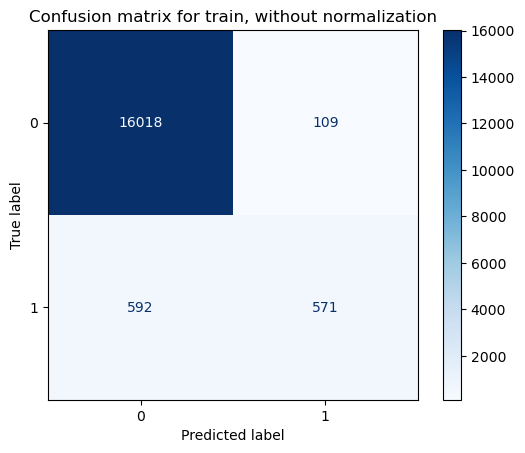

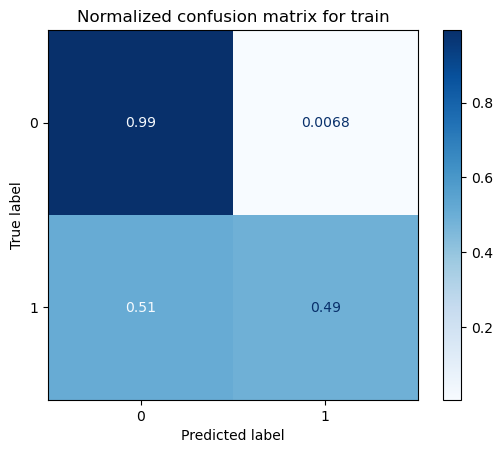

In [491]:
# Training confusion matrix

titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = model3_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model3_pipeline, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3970   24]
 [ 154  175]]
Normalized confusion matrix for test
[[0.99399099 0.00600901]
 [0.46808511 0.53191489]]


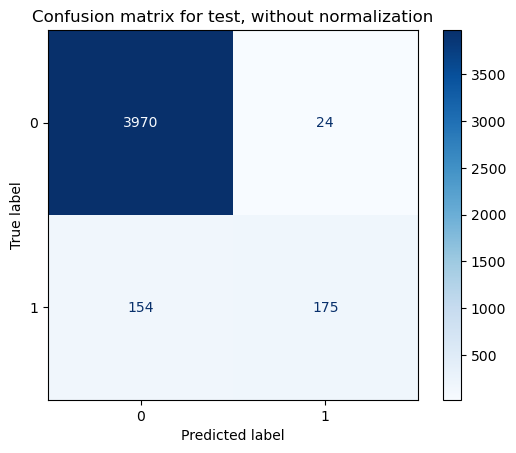

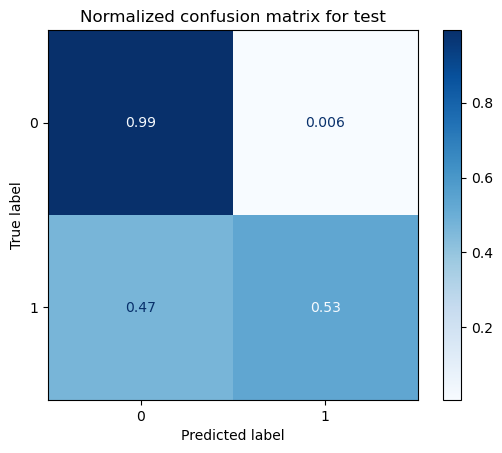

In [492]:
# Test confusion matrix

titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = model3_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model3_pipeline, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Plot of Coefficients

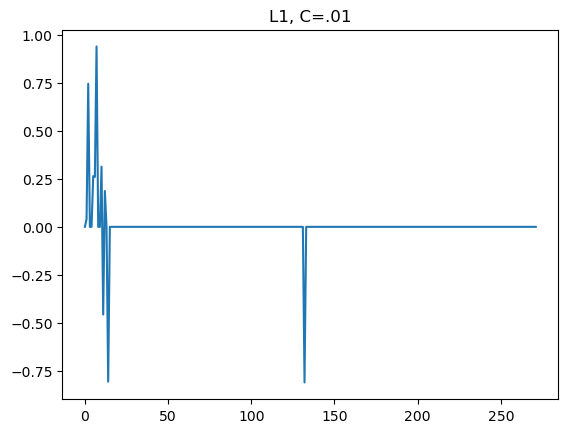

In [493]:
# Model 3 Plot of Coefficients

coef_plot(model3_pipeline, 'L1, C=.01')
plt.show()

The plot of coefficients for Model 3 looks much different than Model 2 or 3. This is because Model 3 has a lower C value than Model 1 or 2 and thus higher regularization. The plot of coefficients for Model 3 shows many of the coefficients are driven to 0, which would be expected with the lower C value.

### Model 4: Lasso Regression with Optimal C Value

In [494]:
# Classifier model.
model4 = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=2000)

In [495]:
# Build the full prediction pipeline.
model4_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model4)])

In [496]:
# Fit the model.
model4_pipeline.fit(X_train, y_train)

/Applications/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'yr_built',
                                                   'yr_renovated',
                                                   'zipcode'])])),
                ('classifier',
                 LogisticRegressionCV(max_iter=2000, penalty='l1',
                                      solver='saga'))])

In [497]:
# Find the optimal C value.

optimal_c = model4_pipeline.steps[1][1].C_

In [498]:
print(f"Training score: {model4_pipeline.score(X_train, y_train):.3f}")
print(f"Test score: {model4_pipeline.score(X_test, y_test):.3f}")
print(f"Optimal C Value: {optimal_c}")

Training score: 0.978
Test score: 0.971
Optimal C Value: [2.7825594]


Model 4 does better than the null model and Models 1, 2, and 3. It performs just slightly better than Models 2 and 3 with just 1 additional home being classified correctly in the Model 4 test data compared to Model 1 and 2 (as seen in below test confusion matrix).

The training and test scores are quite similar, indicating overfitting/underfitting is not a concern here.

The optimal C value of 2.7 suggests regularization is not helpful here.

#### Confusion Matrices

Confusion matrix for train, without normalization
[[16004   123]
 [  261   902]]
Normalized confusion matrix for train
[[0.99237304 0.00762696]
 [0.2244196  0.7755804 ]]


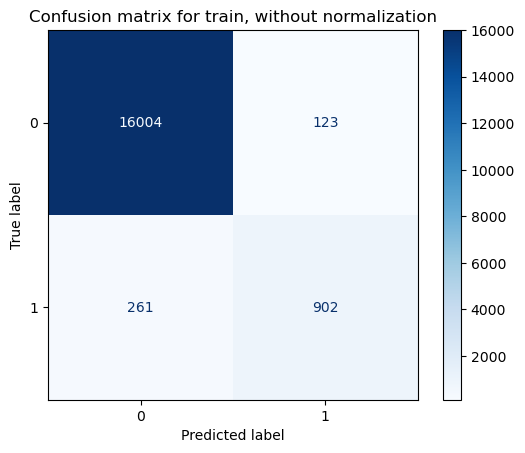

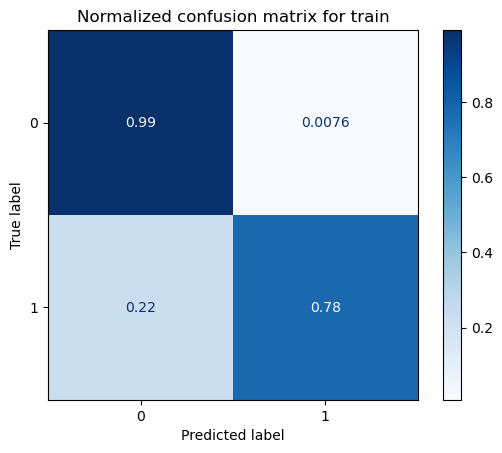

In [500]:
# Training confusion matrix

titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = model4_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model4_pipeline, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3956   38]
 [  89  240]]
Normalized confusion matrix for test
[[0.99048573 0.00951427]
 [0.27051672 0.72948328]]


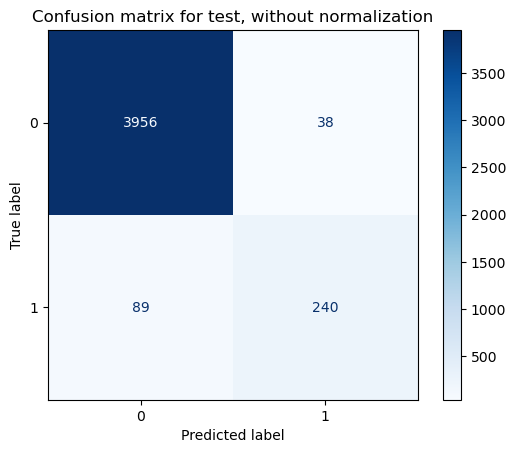

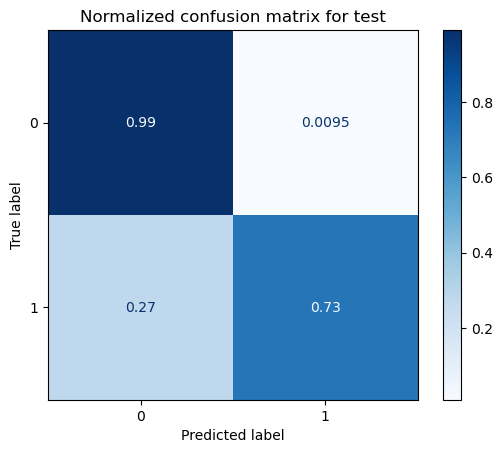

In [502]:
# Test confusion matrix

titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = model4_pipeline['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(model4_pipeline, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Plot of Coefficients

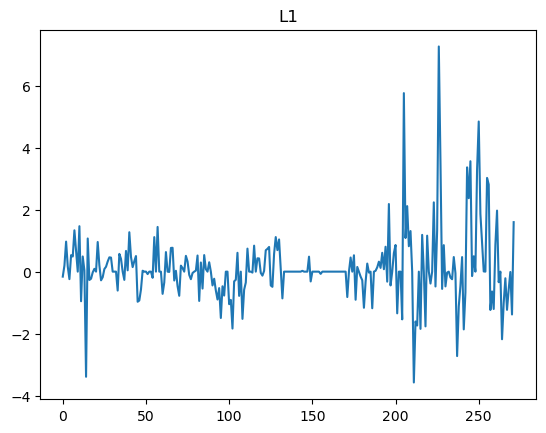

In [503]:
# Model 4 Plot of Coefficients

coef_plot(model4_pipeline, 'L1')
plt.show()

## Simple Decision Tree

In [504]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [505]:
# Create decision tree.

decision_tree = tree.DecisionTreeClassifier()

In [506]:
# Fit decision tree.

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [507]:
print(f"Training score: {decision_tree.score(X_train, y_train):.3f}")
print(f"Test score: {decision_tree.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.955


The training score is better than the null model or any of the logistic regression models. The decision tree correctly classified all of the homes in the training data. The test score is lower than Models 1, 2, 3, and 4 though indicating the logistic regression models all performed better than the decision tree.

The .045 difference in the training and test scores could suggest some overfitting.

#### Confusion Matrices

Confusion matrix for train, without normalization
[[16127     0]
 [    0  1163]]
Normalized confusion matrix for train
[[1. 0.]
 [0. 1.]]


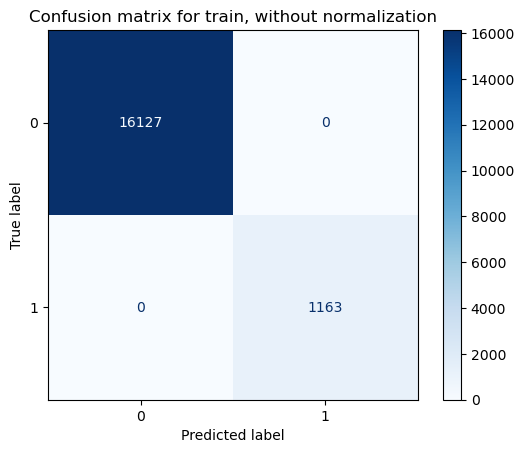

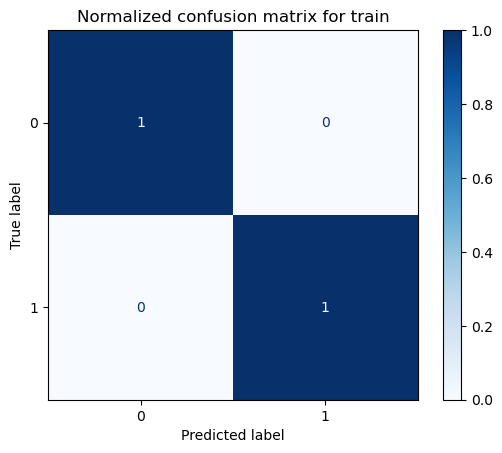

In [508]:
# Training confusion matrix

titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = decision_tree.classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(decision_tree, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3896   98]
 [  96  233]]
Normalized confusion matrix for test
[[0.97546319 0.02453681]
 [0.29179331 0.70820669]]


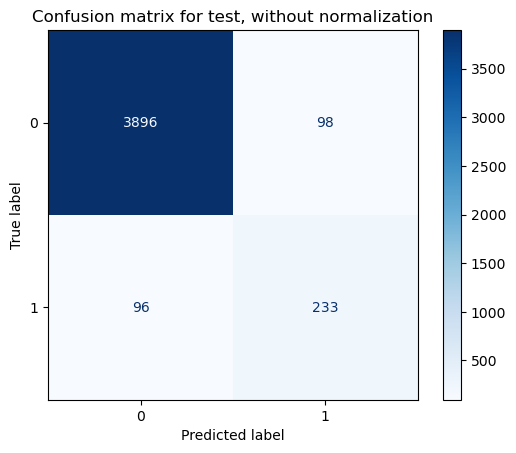

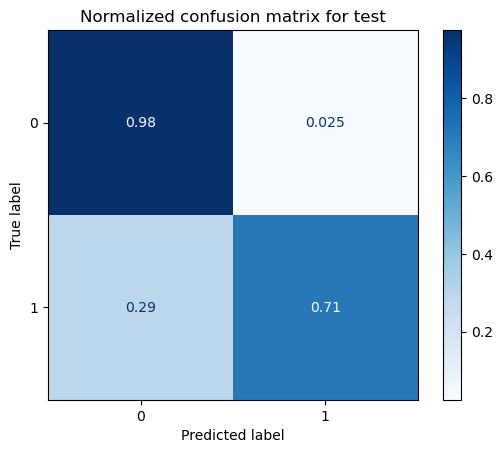

In [509]:
# Test confusion matrix

titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = decision_tree.classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Decision Tree Output

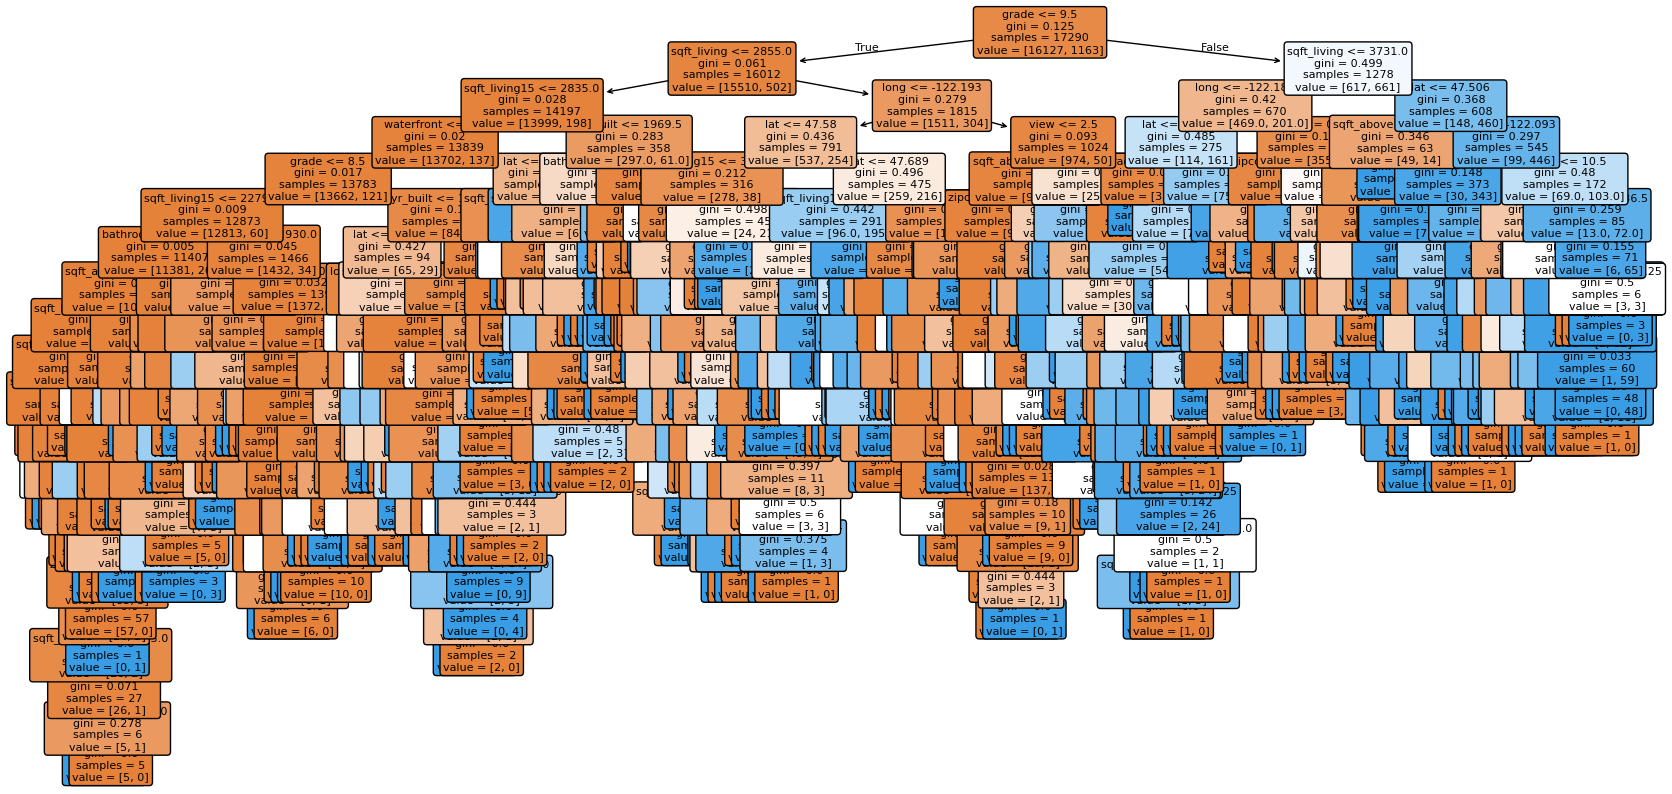

In [510]:
# Display the decision tree.

plt.figure(figsize = (20, 10))
plot_tree(decision_tree,
          feature_names = X.columns,
         rounded = True,
         filled = True,
         fontsize = 8)
plt.show()

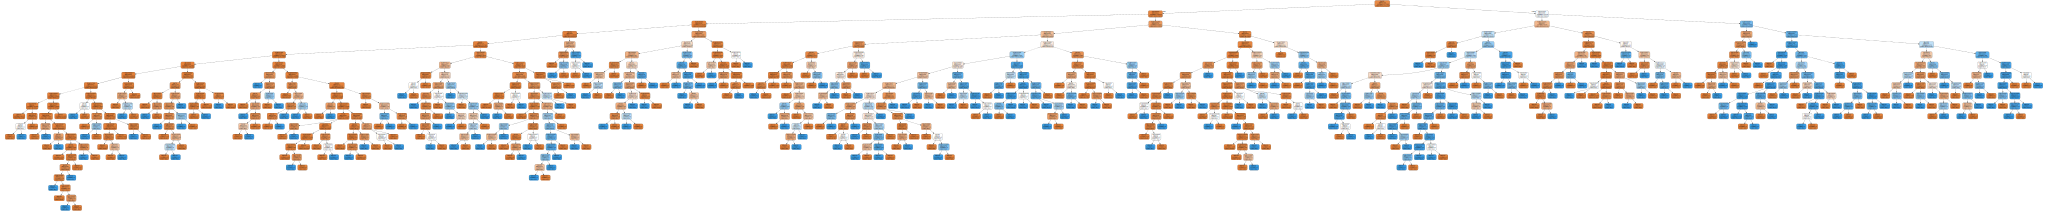

In [511]:
# Make the decision tree readable using graphviz.

dot_data = tree.export_graphviz(decision_tree,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [512]:
# Save decision tree to output folder.

dt = graphviz.Graph(format='png')
file_name = dt.render(filename='output/decision_tree')
graph.render(file_name)

'output/decision_tree.png.pdf'

## Price Histogram

In [513]:
# Load dataset with pricing detail.

housing_price_df = pd.read_csv('./data/kc_house_data_regression.csv')

In [514]:
# Join Price column from housing_price_df to housing_df on index.

housing_df = housing_df.join(housing_price_df["price"])

In [515]:
# Join Price column from housing_df to test & train data on index.

joined_X_train = X_train.join(housing_df["price"], on=X_train.index)
joined_X_test = X_test.join(housing_df["price"], on=X_test.index)

In [516]:
# Predict.

y_predict_test = model2_pipeline.predict(X_test)

In [517]:
# Identify the indices of the misclassifications.

errors = X_test.index[y_predict_test != y_test]

In [518]:
# Identify the price of the misclassifications.

error_prices = housing_df.loc[errors, "price"].values

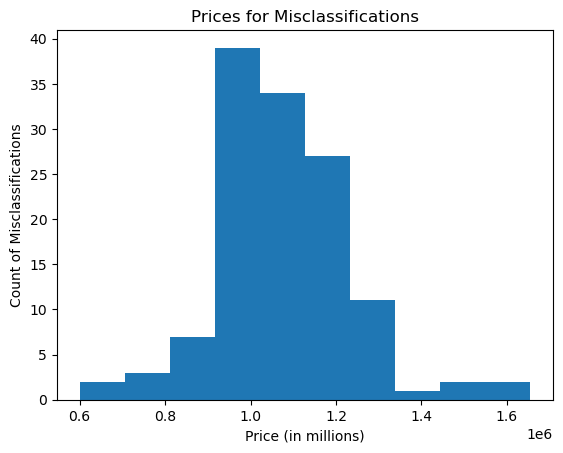

In [519]:
# Create histogram.

plt.hist(error_prices, bins=10)
plt.title("Prices for Misclassifications")
plt.xlabel("Price (in millions)")
plt.ylabel("Count of Misclassifications")
plt.show()